<a href="https://colab.research.google.com/github/Lanlanb/Final-Projects-Kelas.work/blob/main/Case02_Housing_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tahap 1: Exploratory Data Analysis (EDA)**

## Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statistics as stats
import scipy.stats as stats

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# mengimport dataset
house = pd.read_csv('/content/drive/My Drive/Final Project Bootcamp/Dataset/Case02_Housing_Price/train.csv')

*Sample data dapat di temukan di [kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

## Data Understanding

In [ ]:
# menampilkan informasi umum
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# melihat baris pertama dari dataset (default 5)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# menampilkan baris terakhir dari dataset (default 5)
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Seperti yang terlihat:
* terdapat 81 coloums atau feature dari dataset Housing Price.
* Beberapa variabel seperti `LotFrontage, LotArea, HouseStyle, SaleType, SaleCondition` dan `SalePrice`— yang akan diprediksi, mungkin dapat dipahami atau diketahui hanya dengan melihat namanya saja.
* Namun untuk variabel lain dengan penamaan yang rumit, diperlukan pemahaman mendalam mengenai data tersebut.
* Dalam hal ini, penyedia data (umumnya) menyediakan deskripsi mengenai data dan variabel-variabelnya.


---
Deskripsi singkat dari variabel tersebut dapat ditemukan di laman penyedia data pada bagian data atau data description. Berikut adalah uraiannya:

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

#### Menangani missing value

In [ ]:
# melihat persentase nilai NaN
total = house.isnull().sum().sort_values (ascending = False)
percent = (house.isnull().sum() / house.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


Terdapat 19 variabel NaN dari 81 variabel yang dimiliki. Untuk melihat perbandingan atau hasil dari setiap variabel, sepintas dapat dilihat pada output ```house.info``` yang telah dijalankan sebelumnya. Akan tetapi, untuk memperjelas apakah persebaran nilai nan seimbang, resesif atau dominan pada dataset house price, maka dengan melihat 20 baris pertama (dapat disesuaikan) dari columns dengan jumlah NaN terbanyak, adalah salah satu kacamata untuk menilai bagaimana persebaran data dalam dataset.

Untuk lebih jelas, melihat perbandingan yang terdapat pada 4 columns dengan nilai NaN terbanyak dapat dilihat pada operasi di bawah ini:

In [ ]:
# melihat persebaran data nan pada empat columns pemilik nan teratas
nan_highest = house[['PoolQC', 'MiscFeature', 'Alley', 'Fence']]
nan_highest.head(20)

,PoolQC,MiscFeature,Alley,Fence
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,Shed,NaN,MnPrv
6,NaN,NaN,NaN,NaN
7,NaN,Shed,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


Dari table di atas, nilai nan dan statusnya dalam dataset akan terlihat. Apakah columns yang memiliki peringkat nan tertinggi memang mencerminkan keadaannya? Apakah persebaran nilai nan dapat dilihat pada dataset (sebagaimana mestinya)?

```
Conclusion 1:
Nilai nan yang dominan pada empat columns dengan peringkat nan tertinggi ataupun pada dataset secara keseluruhan memerlukan penanganan yang segera.
```


---
Adapun beberapa cara yang dapat dilakukan untuk menangani NaN atau missing value:

1. Menghapus Data: Cocok jika data yang hilang sedikit dan secara acak.
2. Imputasi Nilai: Cocok jika data yang hilang cukup signifikan dan ingin meminimalkan kehilangan data.
3. Model-Based Imputation: Cocok untuk dataset besar dengan pola yang kuat antar variabel.
4. Menambah Variabel Indikator: Cocok jika ingin mempertahankan informasi tentang data yang hilang.

In [ ]:
total_nan = house.isnull().sum().sum() # total nan di seluruh dataset
total_elements = house.size # total elemen yang ada dalam dataset
percent_nan = (total_nan / total_elements) * 100 # persentase

# menampilkan persentase total elemen dalam dataset (baris x kolom)
print(f"jmh nan: {total_nan}")
print(f"jmh elements: {total_elements}")
print(f"Persentase NaN dari keseluruhan data: {round(percent_nan, 2)}%")

jmh nan: 7829
jmh elements: 118260
Persentase NaN dari keseluruhan data: 6.62%


Berdasarkan keadaan dan kondisi yang ada, maka akan diterapkan penghapusan data pada dataset. Adapun beberapa hal yang menjadi pertimbangannya:

1. Hasil 6.62% dari perhitungan nilai NaN pada dataset adalah nilai yang terbilang kecil dan bersifat acak.
2. Tidak ingin mempertahankan informasi tentang data (yang akan) dihilangkan.
2. Menghapus beberapa variabel (baris atau kolom) yang memiliki nilai NaN tidak akan berdampak signifikan pada hasil analisis atau akurasi model.

---
Walaupun demikian, ada beberapa hal lain yang juga harus dipertimbangkan dan dihitung untuk menghapus (drop) nan yang tepat.
```
Conclusion 2:
mencari nilai baris dan kolom dalam dataset untuk memilah skala kepentingannya (baris/kolom yang mendapat hasil terendah adalah yang akan dihapuskan)
```

### memetakan baris dan kolom

In [ ]:
rows_with_nan = house.isnull().any(axis=1).sum() # jumlah rows yang memiliki nan
total_rows = house.shape[0] # jumlah rows
percent_rows_nan = (rows_with_nan / total_rows) * 100 # persentase

# menampilkan hasil
print(f"jmh rows NaN: {rows_with_nan}")
print(f"jmh rows: {total_rows}")
print(f"Persentase baris yang memiliki NaN: {round(percent_rows_nan, 2)}%")

jmh rows NaN: 1460
jmh rows: 1460
Persentase baris yang memiliki NaN: 100.0%


In [ ]:
nan_per_row = house.isnull().sum(axis=1) # menghitung jumlah NaN dalam setiap baris
nan_per_row_percent = (nan_per_row / house.shape[1]) * 100 # menghitung persentase jumlah man dalam setiap baris pada dataset
nan_table = pd.concat([nan_per_row, nan_per_row_percent], axis=1) # menggabungkan kedua hasil
nan_table.columns = ['Jumlah NaN', 'Persentase NaN'] # memberikan nama pada columns

# menampilkan tabel
nan_table.head(20)

,Jumlah NaN,Persentase NaN
0,5,6.172840
1,5,6.172840
2,4,4.938272
3,5,6.172840
4,4,4.938272
5,4,4.938272
6,4,4.938272
7,4,4.938272
8,5,6.172840
9,5,6.172840


In [ ]:
# Menghitung jumlah kolom yang memiliki NaN
columns_with_nan = house.isnull().any().sum()
total_columns = house.shape[1] # jumlah total columns
percent_columns_nan = (columns_with_nan / total_columns) * 100 # persentase

print(f"jmh columns NaN: {columns_with_nan}")
print(f"jmh columns: {total_columns}")
print(f"Persentase kolom yang memiliki NaN: {round(percent_columns_nan, 2)}%")

jmh columns NaN: 19
jmh columns: 81
Persentase kolom yang memiliki NaN: 23.46%


Melihat hasil yang didapatkan, diketahui:
1. bahwa jumlah rows yang memiliki nilai dan jumlah rows (secara keseluruhan) pada dataset memiliki nilai yang sama.
2. Terbukti dengan nilai 23.46% dari 81 kolom, hal ini menunjukkan penghapusan kolom memiliki keefektifan lebih tinggi dibanding dengan menghapus semua baris yang mengandung nan. Indikasi lainnya adalah 23.46% adalah nilai yang mengubah bentuk dari dataset itu sendiri.
3. Berkenaan dengan point pertama, setiap baris pada dataset setidaknya memiliki 1 nilai NaN di dalamnya. Dimana nilai 100% menunjukkan jumlah atau persentase rows yang memiliki nilai nan, dengan (```any```) yang berarti; setidaknya dalam satu rows ada (minimal satu) nilai nan.

In [ ]:
# membuang nan
house_dropnan = house.dropna(axis=1)
house_dropnan.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Seperti yang diperkirakan, bentuk dari dataset house price mengalami perubahan. Yakni pada columns atau variabelnya, dengan total 23.46% nan yang ada pada dataset. Secara kasar, bentuk dari dataset yang baru dapat diketahui dengan mengalikan baris yang tidak dipilih dengan columns yang tersisa. Akan tetapi, untuk memeriksanya dapat diketahui dengan menggunakan beberapa perintah summary seperti di bawah ini:

In [ ]:
house_dropnan.shape

(1460, 62)

```
house_dropnan ----- dataframe house yang telah dilakukan drop nan
```
**Ini adalah data bersih yang dimiliki setelah membuang kolom dengan nilai kosong**

### memisahkan data numerikal dan kategorikal

Sekilas, tipe data pada dataset dapat dilihat pada ```house.info() ``` yang sebelumnya telah dijalankan. Yakni, dataset house price memiliki clomun

In [ ]:
# memisahkan data numerik dan kategorikal
numerical_house = house_dropnan.select_dtypes(include=['int64', 'float64'])
categorical_house = house_dropnan.select_dtypes(include=['object'])

In [ ]:
# menampilkan table variabel yang memiliki nilai numerik
numerical_house.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
print(f"jumlah columns numerik: {numerical_house.shape[1]}")
numerical_house.info()

jumlah columns numerik: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 n

Dari output yang dihasilkan, diketahui bahwa terdapat 35 columns yang memiliki tipe data numerik.

In [ ]:
categorical_house.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


Setelah memisahkan antara data numerik dan kategorikal. Langkah selanjutnya adalah dengan melakukan visualisasi pada data. Namun, untuk memudahkan dokumentasi proyek ini, maka data-data yang sudah dipisahkan itu akan dieksport menjadi file csv.

In [ ]:
# menyimpan data numerik dan categorical sebagai file csv
numerical_house.to_csv('/content/drive/My Drive/Job Applications by Bulan Nurlaela/Portofolio/My projects ✅/Data Science/Final Project Bootcamp/Dataset/Case02_Housing_Price/numerical_house.csv')
categorical_house.to_csv('/content/drive/My Drive/Job Applications by Bulan Nurlaela/Portofolio/My projects ✅/Data Science/Final Project Bootcamp/Dataset/Case02_Housing_Price/categorical_house.csv')

# Tahap 2: 1D Visualization

## Data Exploration

### Univariate Analysis

Sebelumnya, variabel numerik dan kategorikal telah didapatkan dari dataset baru dan telah diberi nama ```numerical_house``` dan ```categorical_house```. Oleh karena itu, selanjutnya adalah melakukan univariate analysis. Univariate Analysis mengacu pada analisis yang hanya melibatkan satu variabel (satu dimensi data) saja. Tujuan utamanya adalah untuk memahami karakteristik dasar dari variabel tersebut tanpa mempertimbangkan pengaruh dari variabel lain. Untuk melakukan univariate analysis, diperlukan representasi yang dapat dilakukan:

#### Visualization 1D:

1. Visualisasi Bar Chart untuk variabel kategorikal
2. Visualisasi Histogram untuk variabel numerikal
3. Transformasi log-10 untuk variabel numerikal dan lakukan visualisasi ulang setelah transformasi..

##### categorical variabel

###### analisis terhadap Utilities

In [ ]:
categorical_house['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)


```
Utilities: Type of utilities (fasilitas /layanan) available
AllPub - All public Utilities (E,G,W,& S)
* E: Electricity (Listrik)
* G: Gas
* W: Water (Air)
* S: Sewer (Saluran pembuangan)
NoSeWa (No Sewer, Water) - Electricity and Gas Only
```

Utilities: Style of dwelling
AllPub.    1459 ---- 99.931507
NoSeWa.    1 ---- 0.068493


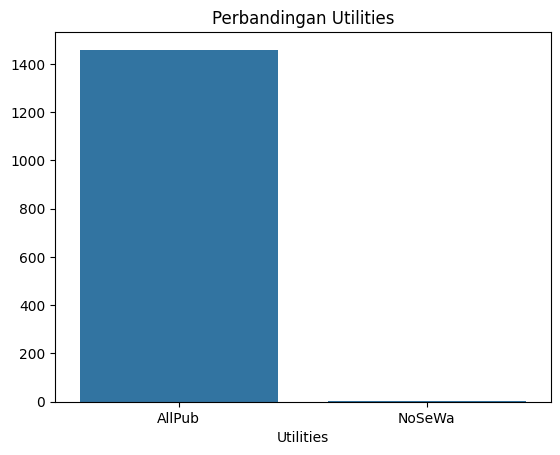

In [ ]:
# Mendefinisikan variabel
a = "Utilities"
x = categorical_house[a]
y = round(x.value_counts(normalize=True) * 100, 6)

# Menyiapkan judul dan label
plt.title(f"Perbandingan {a}") # judul

# Gabungkan jumlah dan persentase untuk output
print(f"{a}: Style of dwelling")
for style, count, percent in zip(x.value_counts().index, x.value_counts().values, y):
    print(f"{style}.    {count} ---- {percent}")
# Visualisasi
sns.barplot(x=x.value_counts().index, y=x.value_counts().values)

plt.show()

Analisis:
1. Persebaran didominasi oleh kategori ```AllPub``` dengan nilai kemunculan lebih dari 90% dibandingkan dengan NoSeWa. Yang menandakan terdapat 1459 properti (house) yang memiliki akses ke semua fasilitas.
2. Kategori NoSeWa memiliki kemunculan yang sangat kecil, yakni hanya 0.06% dari 1460 properti yang ada. Dapat diartikan, properti yang hanya menyediakan listrik dan gas cenderung kurang diminati.
3. Dari grafik di atas, besarnya perbandingan antara kedua kategori menandakan imbalance-nya data.
4. Ketika melihat persebaran seperti ini, adapun rumusan masalahnya:
* Mengapa Utilitas publik memiliki kemunculan terbanyak? Apakah memang Karena properti dengan kategori AllPub dianggap lebih diinginkan dan lebih bernilai (memiliki tren)?
* Ketimpangan yang besar antara properti dengan akses ke semua fasilitas dengan properti yang hanya memiliki akses ke listrik dan gas, apakah menandakan keberhasilan menyediakan properti yang layak dan sesuai dengan standar?

###### analisis tentang HouseStyle

In [ ]:
categorical_house['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

```
HouseStyle: Style of dwelling
* 1Story   One story
* 1.5Fin   One and one-half story: 2nd level finished
* 1.5Unf   One and one-half story: 2nd level unfinished
* 2Story   Two story
* 2.5Fin   Two and one-half story: 2nd level finished
* 2.5Unf   Two and one-half story: 2nd level unfinished
* SFoyer   Split Foyer
* SLvl     Split Level
```

HouseStyle: Style of dwelling
1Story.    726 ---- 49.726027
2Story.    445 ---- 30.479452
1.5Fin.    154 ---- 10.547945
SLvl.    65 ---- 4.452055
SFoyer.    37 ---- 2.534247
1.5Unf.    14 ---- 0.958904
2.5Unf.    11 ---- 0.753425
2.5Fin.    8 ---- 0.547945


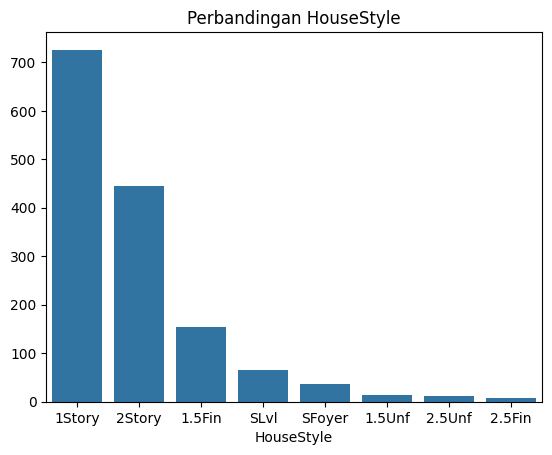

In [ ]:

# Mendefinisikan variabel
a = "HouseStyle"
x = categorical_house[a]
y = round(x.value_counts(normalize=True) * 100, 6)

# Menyiapkan judul dan label
plt.title(f"Perbandingan {a}") # judul

# Gabungkan jumlah dan persentase untuk output
print(f"{a}: Style of dwelling")
for style, count, percent in zip(x.value_counts().index, x.value_counts().values, y):
    print(f"{style}.    {count} ---- {percent}")
# Visualisasi
sns.barplot(x=x.value_counts().index, y=x.value_counts().values)

plt.show()

Analisis
1. 1Story mendominasi dengan 726 unit, yang mewakili 49.73% dari total properti. Ini menunjukkan bahwa hampir setengah dari seluruh properti dalam dataset adalah rumah satu lantai.
2. 2Story juga memiliki proporsi yang signifikan dengan 445 unit (30.48%), menjadikannya pilihan kedua yang paling umum.
3. Gabungan keduanya menyumbang lebih dari 80% dari total properti, yang menunjukkan preferensi yang jelas untuk desain yang lebih konvensional dan praktis.
4. 1.5Fin (154 unit, 10.55%), SLvl (65 unit, 4.45%), dan SFoyer(37, 2.53%), memiliki kemunculan yang rendah. Yang menunjukkan adanya penyimpanan tren dari tren rumah dengan satu dan dua lantai.
5. 1.5Unf (14 unit, 0.96%), 2.5Unf (11 unit, 0.75%), dan 2.5Fin (8 unit, 0.55%) menunjukkan angka yang sangat kecil. Hal itu membenarkan adanya tren dalam properti.
6. Dan dapat diartikan, terjadi imbalance data dalam variabel HouseStyle. Hal ini menunjukkan bahwa pasar lebih menyukai rumah dengan gaya yang lebih umum (satu dan dua lantai), sementara gaya rumah lainnya memiliki daya tarik yang jauh lebih rendah.
7. Ketika melihat persebaran data seperti ini, adapun rumusan masalahnya:
* Apa penyebab preferensi dari dominasi gaya rumah 1Story dan 2Story dalam data properti? Apakah hal tersebut mencerminkan adanya tren dalam properti?
* Mengapa kategori gaya rumah lainnya, seperti 1.5Fin, SLvl, dan SFoyer, memiliki kemunculan yang sangat rendah? Apakah memang terjadi penyimpangan antar data?
* Apakah kategori-kategori tersebut dapat mempengaruhi variabel atau data lain?
* Bagaimana ketidakseimbangan dalam persebaran gaya rumah mempengaruhi keputusan harga rumah?

###### Analisis terhadap ExterQual

In [ ]:
exter_qual = categorical_house['ExterQual'] # ambil data dari variabel
exter_qual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

```
ExterQual: Evaluates the quality of the material on the exterior
* Ex   Excellent
* Gd   Good
* TA   Average/Typical
* Fa   Fair
```

ExterQual: Style of dwelling
TA.    906 ---- 62.054795
Gd.    488 ---- 33.424658
Ex.    52 ---- 3.561644
Fa.    14 ---- 0.958904


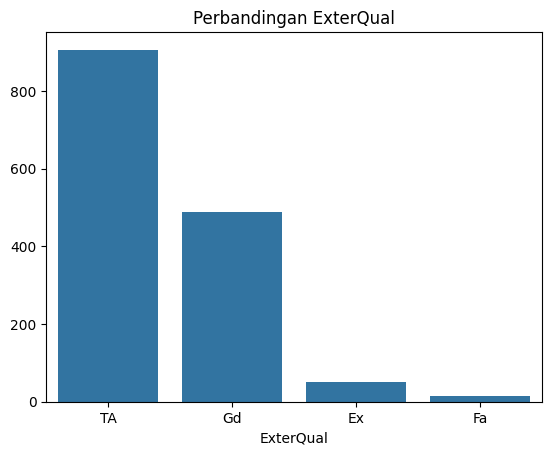

In [ ]:

# Mendefinisikan variabel
a = "ExterQual"
x = categorical_house[a]
y = round(x.value_counts(normalize=True) * 100, 6)

# Menyiapkan judul dan label
plt.title(f"Perbandingan {a}") # judul

# Gabungkan jumlah dan persentase untuk output
print(f"{a}: Style of dwelling")
for style, count, percent in zip(x.value_counts().index, x.value_counts().values, y):
    print(f"{style}.    {count} ---- {percent}")
# Visualisasi
sns.barplot(x=x.value_counts().index, y=x.value_counts().values)

plt.show()

Analisa:
1. Seperti dua variabel sebelumnya, persebaran data kategori pada variabel evaluasi kualitas bagian luar (eksterior) adalah imbalance.
2. Kategori rata-rata pada evaluasi kualitas menunjukkan angka 62.05% atau lebih dari setengah data properti memiliki kualitas yang rata-rata atau sesuai dengan standar umum.
3. Adapun terdapat 488 properti yang memiliki kualitas baik dan tidak mengalami masalah yang signifikan, yakni setengah lebih rendah dari standar umum.
4. Di sisi lain, hanya 3.56% atau 52 properti yang dinilai Excellent, yang bisa menjadi indikasi bahwa kualitas material properti secara keseluruhan lebih rendah. Meskipun demikian, hal ini juga bisa menunjukkan bahwa material berkualitas tinggi masih cukup terpenuhi pada properti-properti tertentu.
5. Terdapat pertimbangan lain dengan melihat persentase dari kategori ```Fa```, yang tidak tertinggal cukup jauh dengan penilaian Excellent. Yakni tidak kurang dari 5%.
6. Tidak kalah pentingnya, tidak adanya properti dengan kategori ```Poor```, menunjukkan bahwa meskipun distribusi kualitas tidak seimbang, tidak ada properti yang memiliki kondisi eksterior yang benar-benar buruk.
7. Distribusi yang tidak merata ini mengindikasikan bahwa properti umumnya berada di kategori dengan kualitas positif, namun ada kesenjangan antara properti berkualitas tinggi dan yang cukup
8. Ketika melihat persebaran data seperti itu, adapun rumusan masalahnya:
* Apa faktor yang mempengaruhi penilaian evaluasi kualitas material eksterior pada properti? Apakah ada perbedaan signifikan dalam indikator penilaian kualitas material?
* Hal apa yang menyebabkan distribusi kualitas menjadi tidak seimbang?
* Apakah tidak adanya properti dengan kondisi eksterior yang benar-benar buruk (```poor```) dapat mengindikasikan bahwa standar minimal kualitas material eksterior pada properti masih terjaga, meskipun hanya sedikit yang mencapai kualitas Excellent?
* Apakah rendahnya tingkat kualitas properti yang benar-benar bagus dan layak huni dapat memberikan pandangan bahwa agent dan/atau pembangunan lebih memfokuskan properti dengan kategori rata-rata atau cukup (```TA dan Fa```), daripada properti yang mengalami kerusakan cukup parah? Apakah properti yang sesuai dengan standart lebih diprioritaskan daripada meningkatkan kualitas (properti dengan material ```Ex```)?
* Apakah penilaian kualitas material ini dapat memengaruhi variabel lain secara signifikan?

##### numerical variabel

###### analisis terhadap SalePrice

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
```

* Harga Properti yang dijual dalam satuan (mata uang) dollar
* Karena merupakan sebuah harga jual, maka:
   - tidak mungkin bernilai negatif
   - mungkin berkaitan dengan variabel lain.

------------(*)------------
SalePrice statistics
------------(*)------------
mean: 180921.19589041095
median: 163000.0
standard deviation: 79442.50288288662
distribusi skewed ke kanan (positif)


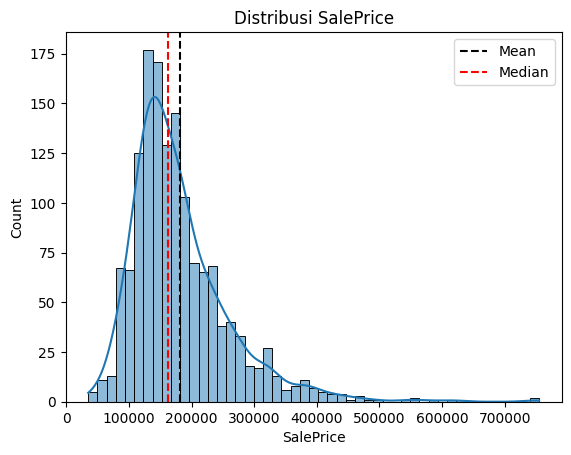

In [ ]:
# mendefinisikan variabel
a = "SalePrice"
x = numerical_house[a]
y = f"{a} statistics"

# membuat histogram dengan KDE
sns.histplot(x, kde=True)
plt.title(f"Distribusi {a}")

# menambahkan garis rata-rata (mean) dan median
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
plt.legend(handles=[line1, line2], loc=1)

# menampilkan nilai mean, median, dan standar deviasi
print("------------(*)------------")
print(y) # judul konsol
print("------------(*)------------")
print(f"mean: {x.mean()}")
print(f"median: {x.median()}")
print(f"standard deviation: {x.std()}")

# menentukan jenis skewness berdasarkan perbandingan mean dan median
if x.mean() > x.median():
    print("distribusi skewed ke kanan (positif)")
elif x.mean() < x.median():
    print("distribusi skewed ke kiri (negatif)")
else:
    print("distribusi simetris")

plt.show()

Analisa:
1. Distribusi Right Skewness, yang berarti ada nilai yang terlalu besar (outlier) yang menarik rata-rata ke arah yang lebih tinggi. Serta secara langsung menegaskan bahwa data tersebar secara imbalance.
2. Harga jual rumah umumnya berada di rentang 100000 - 200000. Yang menunjukkan lebih banyak rumah yang terjual dengan harga murah (lebih kecil) dibanding dengan harga tinggi.
3. Hal itumungkin mengindikasikan bahwa mayoritas pembeli berada dalam kategori kelas menengah, yang cenderung mencari rumah dengan harga yang lebih terjangkau.
4. Sesuai dengan hukum permintaan dan penawaran, ketika harga rumah lebih rendah, jumlah permintaan dari pembeli meningkat. Hal ini menunjukkan bahwa terdapat lebih banyak pembeli yang mampu dan bersedia membeli rumah pada kisaran harga yang lebih rendah.
5. Ketika melihat persebaran seperti ini, adapun rumusan masalahnya:
* Mengapa properti dengan harga yang relatif tinggi memiliki jumlah penjualan yang lebih rendah? Apakah ini berkaitan dengan perbedaan kelas sosial dan daya beli yang lebih rendah pada kelompok tersebut?
* Apakah kelas menengah lebih memilih rumah dengan harga lebih rendah karena keterbatasan anggaran atau karena preferensi terkait lokasi dan fasilitas?
* Apakah tren harga rumah mempengaruhi pembeli untuk membeli properti dengan harga murah? Bagaimana tren harga rumah memengaruhi keputusan pembelian?
* Apakah kualitas properti turut memengaruhi persebaran harga?

###### Analisis terhadap GrLivArea

```
GrLivArea: Above grade (ground) living area square feet
```
* Luas area tempat tinggal di atas permukaan tanah, diukur dalam satuan *square feet*.
* Dapat memiliki pengaruh terhadap variabel lain seperti harga jual (```SalePrice```) dan penilaian kualitas (```ExterQual```).
* Mungkin dapat menyebabkan dan/atau mempengaruhi kelas sosial.

------------(*)------------
GrLivArea statistics
------------(*)------------
mean: 1515.463698630137
median: 1464.0
standard deviation: 525.4803834232025
distribusi skewed ke kanan (positif)


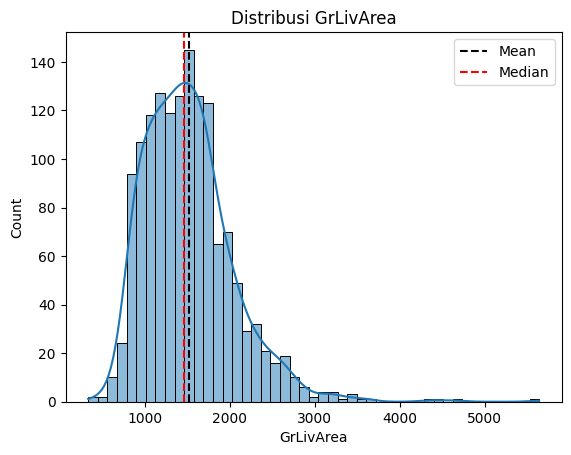

In [ ]:
# mendefinisikan variabel
a = "GrLivArea"
x = numerical_house[a]
y = f"{a} statistics"

# membuat histogram dengan KDE
sns.histplot(x, kde=True)
plt.title(f"Distribusi {a}")

# menambahkan garis rata-rata (mean) dan median
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
plt.legend(handles=[line1, line2], loc=1)

# menampilkan nilai mean, median, dan standar deviasi
print("------------(*)------------")
print(y) # judul konsol
print("------------(*)------------")
print(f"mean: {x.mean()}")
print(f"median: {x.median()}")
print(f"standard deviation: {x.std()}")

# menentukan jenis skewness berdasarkan perbandingan mean dan median
if x.mean() > x.median():
    print("distribusi skewed ke kanan (positif)")
elif x.mean() < x.median():
    print("distribusi skewed ke kiri (negatif)")
else:
    print("distribusi simetris")

plt.show()

Analisa:
1. Distribusi right skewness, yang menunjukkan sebagian besar data terfokus pada nilai yang lebih rendah, tetapi ada beberapa properti dengan ukuran yang jauh lebih besar.
2.Kondisi ini menjadi indikasi bahwa terdapat outlier yang cukup signifikan dalam data, yaitu rumah-rumah yang memiliki luas bangunan yang sangat besar.
3. Dengan demikian, kedua hal tersebut menunjukkan bahwa data tersebar secara tidak seimbang. Yakni pada luas area properti 1000 - 2000 (rentang banyaknya properti 20 - 140), mayoritas data berkumpul.
4. Standar deviasi juga menandakan adanya variasi yang besar dalam ukuran bangunan, yang dapat menguatkan asumsi bahwa kelas sosial memengaruhi variasi dalam karakteristik properti.
5. Melihat persebaran data seperti ini, adapun rumusan masalahnya:
* Apa saja faktor yang menyebabkan variasi signifikan dalam ukuran GrLivArea di antara properti yang berbeda?
* Seberapa besar pengaruh kelas sosial dalam pemilihan properti?
* Bagaimana pengaruh ukuran GrLivArea terhadap harga pasar dan kualitas properti?
* Apa implikasi dari distribusi yang tidak seimbang ini terhadap analisis pasar properti secara keseluruhan?

###### Analisis terhadap PoolArea

```
PoolArea: Pool area in square feet
```
* Luas area kolam tenang yang ada pada properti, diukur dalam satuan kaki persegi (square feet).
* Variabel ini dapat mempengaruhi faktor-faktor lain, seperti harga penjualan properti (SalePrice) dan kualitas eksterior (ExterQual).
* ```PoolArea``` juga mungkin mempengaruhi tingkat atau status sosial penghuni.

In [ ]:
print(numerical_house["PoolArea"].value_counts())

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64


Karena memiliki banyak data yang bernilai 0, maka nilai 0 padabvariabel PoolArea harus di filter terlebih dahulu.

In [ ]:
dropnull = numerical_house[numerical_house[a] > 0]
print(numerical_house['PoolArea'].value_counts())
print(dropnull['PoolArea'])

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64


------------(*)------------
PoolArea statistics
------------(*)------------
mean (filtered):  575.4285714285714
median: (filtered) 555.0
standard deviation: (filtered) 89.84033456240974
distribusi skewed ke kanan (positif)


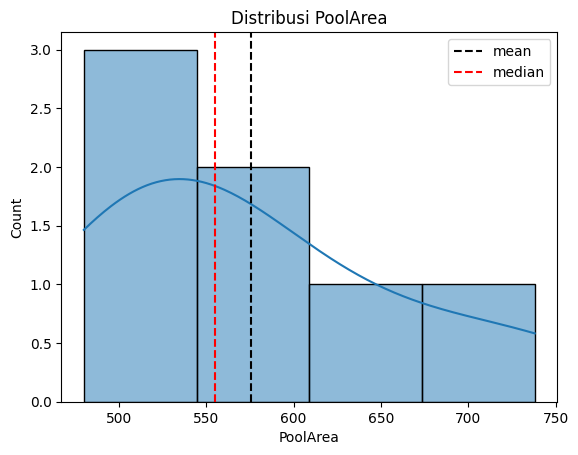

In [ ]:
# mendefinisikan variabel
a = "PoolArea"
dropnull = numerical_house[numerical_house[a] > 0]
x = dropnull[a]
y = f"{a} statistics"

# membuat histogram dengan kde
sns.histplot(x, kde=True)
plt.title(f"Distribusi {a}")  # Judul yang benar

# menambahkan garis rata-rata (mean) dan median
line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)

# menampilkan nilai mean, median, dan standar deviasi
print("------------(*)------------")
print(y)  # judul konsol
print("------------(*)------------")
print ("mean (filtered): ", dropnull[a].mean())
print ("median: (filtered)", dropnull[a].median())
print ("standard deviation: (filtered)", dropnull[a].std())

# menentukan jenis skewness berdasarkan perbandingan mean dan median
if x.mean() > x.median():
    print("distribusi skewed ke kanan (positif)")
elif x.mean() < x.median():
    print("distribusi skewed ke kiri (negatif)")
else:
    print("distribusi simetris")

plt.show()

Analisa:
1. Ketika median bernilai 0, dan distribusi menunjukkan skewness right, ini menandakan bahwa sebagian besar nilai berada di area rendah (di sini, 0).
2. Hal itu juga didukung dengan rata-rata dan standar deviasi, yang menunjukkan meskipun sebagian besar rumah tidak memiliki kolam, ada beberapa yang memiliki area kolam yang sangat besar, menyebabkan nilai penyebaran menjadi tinggi.
3.Kondisi ini menjadi indikasi bahwa terdapat outlier dan data imbalance yang cukup signifikan dalam data.
4. Ketika melihat penyebaran data seperti ini, adapun rumusan masalahnya:
* Mengapa hanya sedikit properti yang memiliki kolam renang? Apakah ada faktor geografis atau sosial yang mempengaruhi preferensi ini?
* Mengapa ketika sebuah properti memiliki kolam renang, luas kolam tersebut cenderung sangat besar?
* Apakah area kolam renang berkontribusi secara signifikan terhadap nilai properti dalam kelompok tertentu?

###### Analisis terhadap numerical variabel

1. Ketiga variabel menunjukkan adanya distribusi right skewness dan outlier, yang berarti data tersebar tidak seimbang dengan mayoritas nilai berada di rentang yang lebih rendah. Sehingga memerlukan penanganan khusus, seperti transformasi data, agar distribusi lebih seimbang untuk analisis yang lebih akurat
2. Standar deviasi yang tinggi menunjukkan adanya variasi besar dalam ukuran dan nilai properti. Yang dapat dilengaruh faktor sosial-ekonomi, seperti kelas sosial, sangat signifikan dalam karakteristik properti.
3. Secara keseluruhan, ketiga variabel ini saling melengkapi dalam memberikan gambaran mengenai dinamika pasar properti, yakni:
* **SalePrice** menunjukkan bahwa sebagian besar rumah terjual pada kisaran harga rendah (100.000 - 200.000), dengan hanya sedikit rumah terjual pada harga yang sangat tinggi. Ini mengindikasikan permintaan yang lebih besar terhadap rumah yang terjangkau.
* **GrLivArea** memperlihatkan bahwa sebagian besar rumah memiliki luas bangunan yang relatif kecil, sementara ada beberapa properti dengan ukuran sangat besar sebagai outlier. Hal ini mencerminkan adanya variasi signifikan dalam ukuran properti yang mungkin dipengaruhi oleh kelas sosial.
* **PoolArea** menunjukkan mayoritas nilai 0, yang berarti sebagian besar rumah tidak dilengkapi kolam renang. Namun, ketika ada kolam renang, luasnya cenderung sangat besar, menunjukkan ketidakseimbangan dalam distribusi kolam renang pada properti.

##### pemrosesan data numerical

------------(*)------------
Log10 Transformed SalePrice
------------(*)------------
Mean: 5.221978956475628
Median: 5.212187604403958
Standard Deviation: 0.17347974217176834


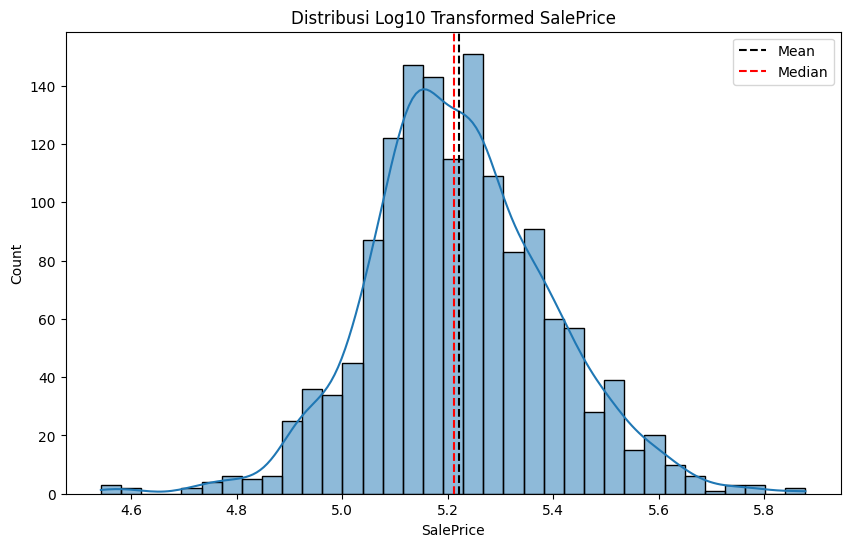

In [ ]:
# mendefinisikan variabel
a = "SalePrice"
x = np.log10(numerical_house[a])
y = f"Log10 Transformed {a}"

# Membuat histogram dengan KDE
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title(f"Distribusi {y}")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
plt.legend(handles=[line1, line2], loc='upper right')

# Menampilkan informasi statistik
print("------------(*)------------")
print(y) # judul konsol
print("------------(*)------------")
print(f"Mean: {x.mean()}")
print(f"Median: {x.median()}")
print(f"Standard Deviation: {x.std()}")

plt.show()

------------(*)------------
Log10 Transformed GrLivArea
------------(*)------------
Mean: 3.156354310389778
Median: 3.165541076722373
Standard Deviation: 0.14485910869663862


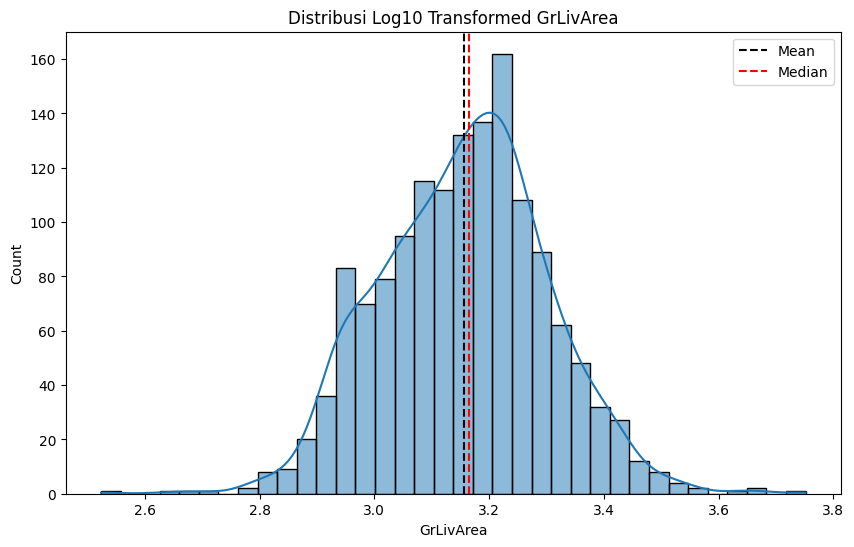

In [ ]:
# mendefinisikan variabel
a = "GrLivArea"
x = np.log10(numerical_house[a])
y = f"Log10 Transformed {a}"

# Membuat histogram dengan KDE
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title(f"Distribusi {y}")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
plt.legend(handles=[line1, line2], loc='upper right')

# Menampilkan informasi statistik
print("------------(*)------------")
print(y) # judul konsol
print("------------(*)------------")
print(f"Mean: {x.mean()}")
print(f"Median: {x.median()}")
print(f"Standard Deviation: {x.std()}")

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


------------(*)------------
Log10 Transformed PoolArea
------------(*)------------
Mean: -inf
Median: -inf
Standard Deviation: nan


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


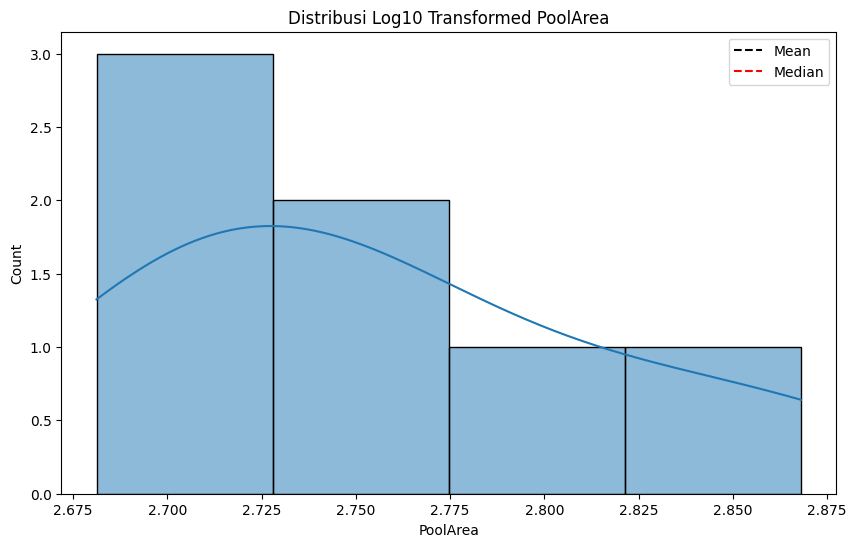

In [ ]:
# mendefinisikan variabel
a = "PoolArea"
x = np.log10(numerical_house[a])
y = f"Log10 Transformed {a}"

# Membuat histogram dengan KDE
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title(f"Distribusi {y}")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
plt.legend(handles=[line1, line2], loc='upper right')

# Menampilkan informasi statistik
print("------------(*)------------")
print(y) # judul konsol
print("------------(*)------------")
print(f"Mean: {x.mean()}")
print(f"Median: {x.median()}")
print(f"Standard Deviation: {x.std()}")

plt.show()

In [ ]:
# Menghitung banyaknya kemunculan nilai unik pada kolom 'PoolArea'
print(numerical_house['PoolArea'].value_counts())
print(numerical_house['PoolArea'].sample(5))

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
597     0
1021    0
987     0
206     0
1044    0
Name: PoolArea, dtype: int64



Analisis:
* Mengapa histogram mengeluarkan hasil yang berbeda antara PoolArea dengan variabel lain? Hal ini bisa diketahui dengan melihat data numerikal pada variabel. Pada variabel PoolArea, diketahui terdapat 8 kategori, yakni ```0, 512, 648, 576, 555, 480, 519, 738```. Namun, jumlah kemunculan kategori 0 memiliki skala yang sangat ekstrim, yakni menyumbang lebih dari 95% dari dataset. Adapun, kategori lain memiliki kemunculan simetris (kecuali 0) yakni masing-masing memiliki satu kemunculan. Dan karena terdapat nilai 0 (bahkan memenuhi dataset) dalam kolom PoolArea, yang menyebabkan pembagian oleh nol saat menghitung logaritma.

------------(*)------------
Log10 Transformed PoolArea
------------(*)------------
Mean: 2.7557179129199136
Median: 2.7442929831226763
Standard Deviation: 0.06486028432445097


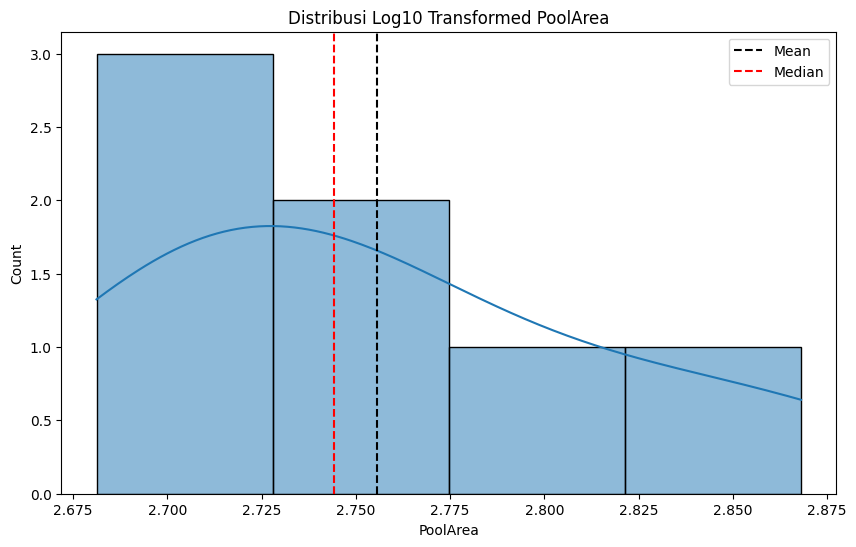

In [ ]:
# mendefinisikan variabel
a = "PoolArea"
x = np.log10(numerical_house[a][numerical_house[a] > 0])
y = f"Log10 Transformed {a}"

# Membuat histogram dengan KDE
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title(f"Distribusi {y}")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
plt.legend(handles=[line1, line2], loc='upper right')

# Menampilkan informasi statistik
print("------------(*)------------")
print(y) # judul konsol
print("------------(*)------------")
print(f"Mean: {x.mean()}")
print(f"Median: {x.median()}")
print(f"Standard Deviation: {x.std()}")

plt.show()

#### Visualization 2D

##### Correlation GrLivArea dengan SalePrice

Koefisien Korelasi Pearson: 0.7086244776126522
P-Value: 4.518033646776417e-223


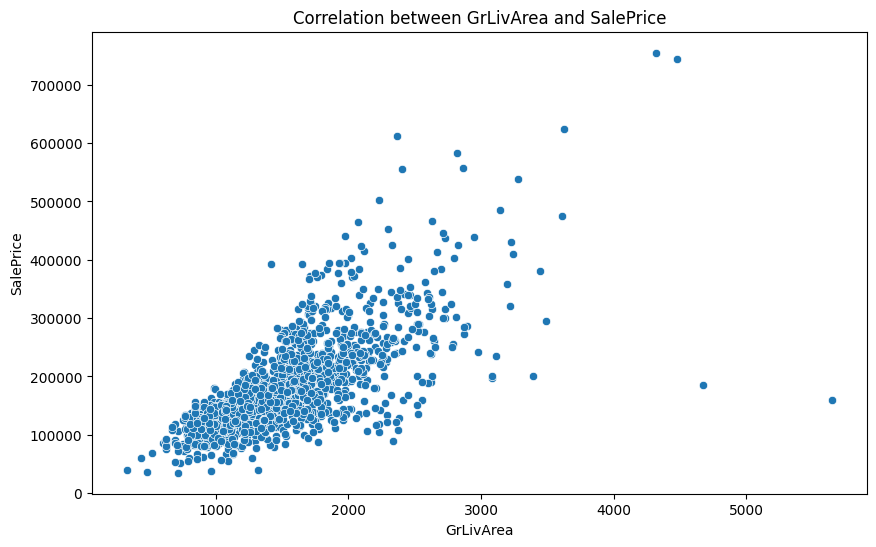

In [ ]:
# Mendefinisikan variabel
x = "GrLivArea" # sumbu x
y = "SalePrice" # sumbu y
dropnull = numerical_house[numerical_house[x] > 0]

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dropnull, x=x, y=y)  # Menggunakan variabel x dan y untuk scatterplot
plt.title(f"Correlation between {x} and {y}")

# Menampilkan plot dan uji korelasi formal
correlation1, p_value1 = stats.pearsonr(dropnull[x], dropnull[y])
print(f"Koefisien Korelasi Pearson: {correlation1}")
print(f"P-Value: {p_value1}")

plt.show()

Analisis:
* Dapat dilihat, ada garis lurus yang dapat ditarik di antara titik-titik, ini menunjukkan hubungan linear. Titik-titik pada grafik pun terlihat naik dari arah kiri (bawah) ke kanan (atas), menggambarkan korelasi yang positif dan slope/kemiringan positif. yang berarti bahwa ada hubungan terus-menerus dan searah antara dua variabel konsisten.
* Sebaran titik-titik itu mengelompok dalam bentuk linier yang jelas, berada sangat dekat dengan garis lurus regresi, tetapi tidak sepenuhnya mengikuti garis lurus. Beberapa titik mungkin tersebar sedikit jauh dari garis tren, namun pola umum tetap menunjukkan bahwa rumah dengan luas area yang lebih besar cenderung memiliki harga yang lebih tinggi.
* Kemudian, ada titik-titik yang memiliki jarah ekstrim di antara kumpulan titik itu, dapat dilihat hal itu adalah outlier.
* Juga, terdapat variabilitas dalam penyebaran data yang membentuk kluster/grup (titik-titik yang berkelompok).
 Yakni pada luas area properti 1000 - 2000 (rentang harga 100000 - 300000).
* Nilai 0.7081721139540181 mendekati angka 1, yang mengindikasikan korelasi kuat, namun tidak terlalu kuat karena tidak sangat dekat dengan angka 1. Artinya, meskipun ada hubungan kuat antara luas area rumah dan harga, faktor lain juga berperan dalam menentukan harga rumah, seperti lokasi, kondisi bangunan, dan fasilitas lainnya.
___

##### analisis terhadap GarageArea


```
GarageArea: Size of garage in square feet
```
* Ukuran garasi rumah (properti) yang diukur dalam satuan ukuran square feet.

Sebelum menganalisis hubungan antara GarageArea dengan SalePrice. Adapun yang harus dilakukan adalah menganalisis variabel GarageArea terlebih dahulu.

In [ ]:
print(f"{house_dropnan['GarageArea'].info()}")
print("------------(*)------------")
print(f"{house_dropnan['GarageArea'].describe()}")

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: GarageArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None
------------(*)------------
count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64


Dari data nilai minimum, dapat diketahui terdapat nilai 0 dalam variabel GarageArea. Sama seperti pada variabel PoolArea, nilai 0 harus dipilah terlebih dahulu.

------------(*)------------
GarageArea statistics
------------(*)------------
mean (filtered):  500.76214648295866
median: (filtered) 484.0
standard deviation: (filtered) 185.68051979433164
distribusi skewed ke kanan (positif)


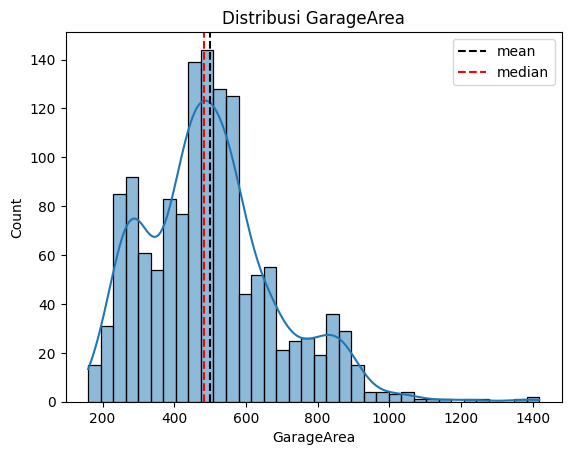

In [ ]:
# mendefinisikan variabel
a = "GarageArea"
dropnull = numerical_house[numerical_house[a] > 0]
x = dropnull[a]
k = f"{a} statistics"

# membuat histogram dengan kde
sns.histplot(x, kde=True)
plt.title(f"Distribusi {a}")  # Judul yang benar

# menambahkan garis rata-rata (mean) dan median
line1 = plt.axvline(x.mean(),color = "k", linestyle = "--", label = "mean")
line2 = plt.axvline(x.median(),color = "r",linestyle = "--", label = "median")
first_legend = plt.legend(handles = [line1,line2],loc=1)

# menampilkan nilai mean, median, dan standar deviasi
print("------------(*)------------")
print(k)  # judul konsol
print("------------(*)------------")
print ("mean (filtered): ", dropnull['GarageArea'].mean())
print ("median: (filtered)", dropnull['GarageArea'].median())
print ("standard deviation: (filtered)", dropnull['GarageArea'].std())

# menentukan jenis skewness berdasarkan perbandingan mean dan median
if x.mean() > x.median():
    print("distribusi skewed ke kanan (positif)")
elif x.mean() < x.median():
    print("distribusi skewed ke kiri (negatif)")
else:
    print("distribusi simetris")

plt.show()

Analisa:
1. Distribusi right skewness, yang menunjukkan rata-rata yang dipengaruhi oleh beberapa outlier (garasi dengan ukuran besar).
2. Karena distribusi skewed ke kanan, median lebih rendah dari mean, yang menunjukkan bahwa sebagian besar data berada di sekitar nilai yang lebih rendah dibandingkan rata-rata.
3. Ketimpangan ini menandakan bahwa data tersebar secara tidak seimbang. Yakni pada luas area garasi 200 - 600 (rentang banyaknya properti 60 - 140), mayoritas data berkumpul.
4. Juga, standar deviasi sebesar 185.68 menunjukkan adanya variasi yang cukup besar dalam ukuran garasi. Hal ini memperkuat indikasi bahwa ada data yang mencakup garasi dengan ukuran sangat besar yang merupakan outlier.
5. Kemudian, point-point tersebut memperkuat asumsi bahwa sebagian besar properti memiliki ukuran garasi yang relatif lebih kecil, sementara ada beberapa properti dengan ukuran garasi yang jauh lebih besar.
6. Pada tahap ini, imbalance-nya data juga memberikan indikasi bahwa terdapat perbedaan preferensi garasi pada properti. Hal ini memungkinkan adanya pengaruh kelas sosial dan variabel lainnya (harga dan kualitas). Di mana rumah dengan ukuran garasi yang luas dimungkinkan terjadi karena adanya perbedaan kelas sosial di masyarakat.
7. Melihat persebaran data seperti ini, adapun rumusan masalahnya:
* Seberapa nyata pengaruh kelas sosial dan preferensi harga pada garasi?
* Apakah properti dengan ukuran garasi yang lebih besar cenderung memiliki nilai jual yang lebih tinggi? Dan apakah properti yang tidak memiliki garasi memiliki nilai jual yang rendah?
* Mengapa ukuran garasi sebagian besar properti lebih kecil dari rata-rata, sedangkan beberapa properti memiliki garasi yang sangat besar?

------------(*)------------
Log10 Transformed GarageArea
------------(*)------------
Mean: 2.6696154158200915
Median: 2.6848453616444123
Standard Deviation: 0.16427840573730199


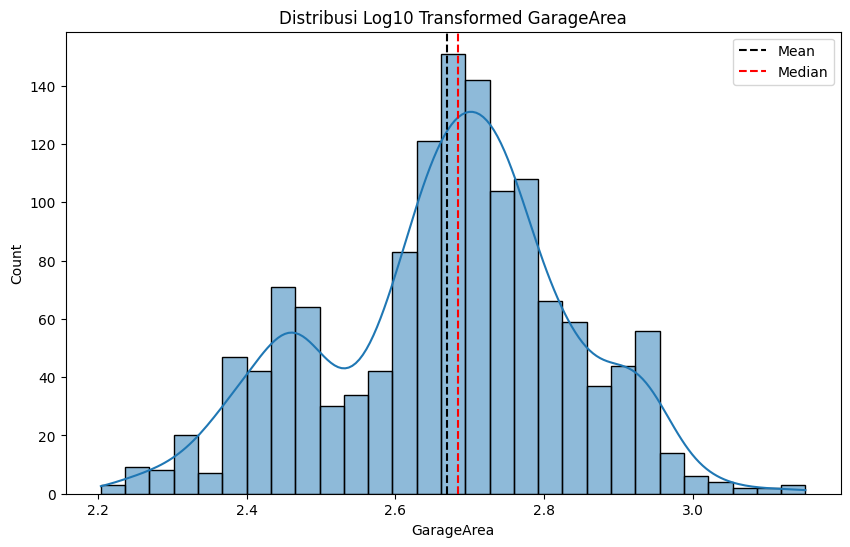

In [ ]:
# mendefinisikan variabel
a = "GarageArea"
x = np.log10(numerical_house[a][numerical_house[a] > 0])
y = f"Log10 Transformed {a}"

# Membuat histogram dengan KDE
plt.figure(figsize=(10, 6))
sns.histplot(x, kde=True)
plt.title(f"Distribusi {y}")
line1 = plt.axvline(x.mean(), color="k", linestyle="--", label="Mean")
line2 = plt.axvline(x.median(), color="r", linestyle="--", label="Median")
plt.legend(handles=[line1, line2], loc='upper right')

# Menampilkan informasi statistik
print("------------(*)------------")
print(y) # judul konsol
print("------------(*)------------")
print(f"Mean: {x.mean()}")
print(f"Median: {x.median()}")
print(f"Standard Deviation: {x.std()}")

plt.show()

Analisis:
1. Setelah dilakukan transformasi, variabel GarageArea memiliki distribusi yan mendekati normal atau cenderung terdistribusi secara simetris. Dimana nilai rata-rata dan median berada sangat dekat.
2. Sebaran data tidak terpusat di satu titik, dimana tidak ada nilai yang terlalu besar ataupun terlalu kecil.
3. Akan tetapi, hasil dari standar deviasi menunjukkan bahwa data cenderung berkumpul di sekitar rata-rata (rentang 2.6 - 2.8), tanpa banyak variasi ekstrem.
5. Adapun, menggunakan logaritma membantu 'meratakan' data yang mungkin tersebar luas atau memiliki nilai ekstrem, sehingga rata-rata menjadi lebih representatif.

###### Korelasi GarageArea dan SalePrice

Koefisien Korelasi Pearson: 0.6084052829168348
P-Value: 2.0850476172658775e-140


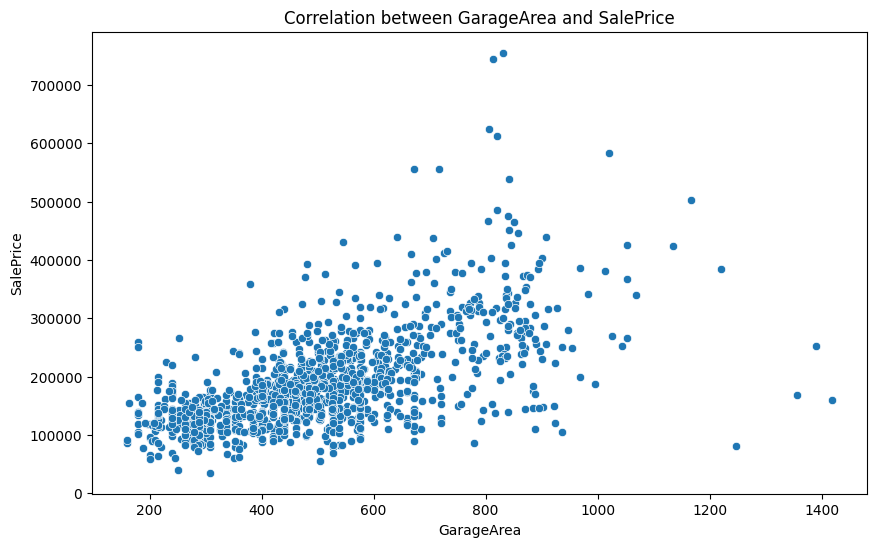

In [ ]:
# Mendefinisikan variabel
x = "GarageArea" # sumbu x
y = "SalePrice" # sumbu y
dropnull = numerical_house[numerical_house[x] > 0]

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dropnull, x=x, y=y)  # Menggunakan variabel x dan y untuk scatterplot
plt.title(f"Correlation between {x} and {y}")

# Menampilkan plot dan uji korelasi formal
correlation2, p_value2 = stats.pearsonr(dropnull[x], dropnull[y])
print(f"Koefisien Korelasi Pearson: {correlation2}")
print(f"P-Value: {p_value2}")

plt.show()

Analisis:
1. Scatterplot dapat ditarik membentuk garis lurus (pola), yang menunjukkan adanya hubungan linear antara kedua variabel.
2. Titik bergerak dari kiri bawah ke kanan atas, ini menunjukkan hubungan positif serta slope/kemiringan yang positif. Yang menandakan bahwa variabel bergerak ke arah yang bersamaan, atau kata lainnya, GarageArea dan SalePrice memiliki hubungan.
3. Namun, jika dilihat lebih jelas terdapat titik yang jaraknya sangat jauh dengan titik-titik lain. Kemudian, walaupun dapat ditarik membentuk garis lurus (regresi), titik-titik tersebar agak jauh dari garis regresi. Yang menandakan bahwa GarageArea dan SalePrice memiliki kekuatan hubungan yang terbilang sedang dan tidak sepenuhnya linear.
4. Melalui uji formal, nilai korelasi Pearson ialah 0.6084052829168349. Atau dapat dibulatkan menjadi 0.61, menunjukkan bahwa GarageArea dan SalePrice memiliki korelasi positif dan cukup kuat. Artinya, rumah dengan area garasi yang lebih besar cenderung memiliki harga yang lebih tinggi (secara umum).
5. Akan tetapi, meskipun nilai korelasi positif ini cukup kuat, angka 0.61 ini tidak dapat dikatakan mendekati 1. Yang artinya masih berada di taraf sedang dan masih ada variabel lain yang mungkin memiliki pengaruh terhadap SalePrice, seperti lokasi, usia rumah, fasilitas lain, dan faktor ekonomi. Yang juga menandakan adanya variabilitas dalam variabel.

##### Hypothesis berdasarkan nilai p-value dan significance level

In [ ]:
# confidence level (tingkat kepercayaan terhadap menolak h0)
confiden_level = 95/100


```
H0: p = significance level
```
Ini berarti tidak ada hubungan yang signifikan.
```
H1: p < significance level
```
Ini berarti bahwa terdapat hubungan (korelasi) yang signifikan antar variabel.
___

In [ ]:
# perbandingan dengan p-value
a = 1 - confiden_level
print(f"significance level (alpha): {round(a, 2)}")
print(f"p-value GrLivArea dan SalePrice: {p_value1}")
print(f"p-value GarageArea dan SalePrice: {p_value2}")

# GrLivArea dan SalePrice
if p_value1 >= a:
   print("gagal menolak h0")
else:
   print("berhasil menolak h0")

# GarageArea dan SalePrice
if p_value2 >= a:
   print("gagal menolak h0")
else:
   print("berhasil menolak h0")
print("-----------p-value-----------")

significance level (alpha): 0.05
p-value GrLivArea dan SalePrice: 4.518033646776417e-223
p-value GarageArea dan SalePrice: 2.0850476172658775e-140
berhasil menolak h0
berhasil menolak h0
-----------p-value-----------


In [ ]:
# pertimbangan lainnya
# Skala Nilai Koefisien Korelasi Pearson (r)
print(f"correlation GrLivArea dan SalePrice (r): {correlation1}")
print(f"correlation GarageArea dan SalePrice (r): {correlation2}")

correlation GrLivArea dan SalePrice (r): 0.7086244776126522
correlation GarageArea dan SalePrice (r): 0.6084052829168348


```
Baik korelasi pada GrLivArea - SalePrice dan GarageArea - SalePrice keduanya berada dalam rentang 0.60 - 0.79,
yang menunjukkan bahwa korelasi ini adalah positif kuat.
Namun, karena nilai ini tidak mendekati 0.80 atau lebih,
kekuatan korelasinya dianggap kuat tetapi belum sangat kuat
```
___

**Hypothesis:**
___

Berdasarkan kedua hasil ini, kita dapat menyimpulkan bahwa:

* Terdapat hubungan yang signifikan antara luas area property dan ukuran garasi dengan harga jual rumah. Hubungan linear itu dapat dinyatakan, bahwa ada hubungan linear signifikan antara GrLivArea dan SalePrice, serta antara GarageArea dan SalePrice. Ini berarti perubahan di GrLivArea dan GarageArea berpengaruh pada perubahan SalePrice secara linear.


___
## Analisis Kesimpulan

1. Tidak ada distribusi normal ataupun simetris dalam variabel kategorikal Utilities, HouseStyle dan ExterQual. Yang menandakan adanya outlier yang menarik rata-rata sehingga menciptakan adanya ketimpangan (imbalance, Skewness dan outlier) dan variasi yang beragam pada HouseStyle dan ExterQual.
2. Pada variabel numerik, terdapat right Skewness dan outlier yang menarik rata-rata jauh ke nilai ekstrim (baik lebih rendah ataupun lebih tinggi) yang membuat distribusi menjadi tidak normal. Sehingga diperlukan transformasi untuk 'menormalkannya'.
3. Setelah melakukan transformasi lada variabel numerik yakni SalePrice, GrLivArea, PoolArea dan GarageArea, distribusi terbukti mendekati normal dan cenderung simetris.
4. Kemudian, adapun hypothesis antara hubungan variabel: ada hubungan linear yang signifikan antara variabel independen dan dependen, yakni berhasil menolak H0 (hipotesis nol), yang menyatakan bahwa tidak ada hubungan antara kedua variabel.
5. Namun, penting untuk dicatat bahwa meskipun korelasi ini signifikan, faktor lain seperti lokasi, kondisi rumah, fasilitas tambahan, dan kondisi pasar juga dapat berperan dalam menentukan harga jual rumah. Oleh karena itu, analisis lebih lanjut diperlukan untuk memahami dinamika yang lebih kompleks pada dataset.

## Github push [**Documentation**]

___
Temukan di sini: [**Github Repository.**](https://github.com/Lanlanb/Final-Projects-Kelas.work/blob/79ec3b6a30f5c038e906d301f9fc4afcb3ee9326/Case02_Housing_Price)